In [ ]:
! ls ../cvs_data/endoscapes/train

/mnt/Enterprise2/saurabh/cvs_data/endoscapes/train/93_36350.jpg


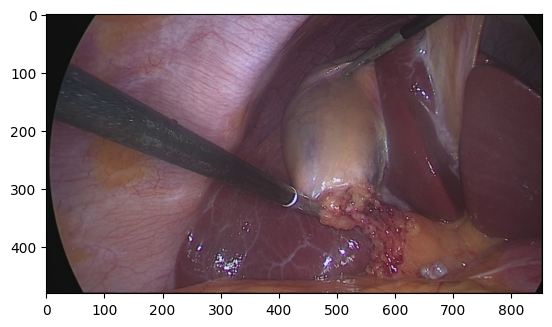

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import os, glob

# path = '/mnt/Enterprise2/saurabh/cvs_data/images/train/*/*.png'
path = '/mnt/Enterprise2/saurabh/cvs_data/endoscapes/train/*.jpg'
files = glob.glob(path)[8]
print(files)

im = Image.open(files)
plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9802322e-08..1.0].


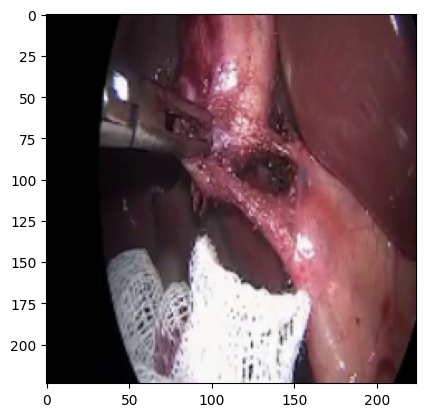

In [11]:
import pickle

with open('./img', 'rb') as f:
    img = pickle.load(f).cpu()

import matplotlib.pyplot as plt
import torch

plt.imshow(img.permute(1, 2, 0)*torch.tensor([0.2576, 0.20095, 0.1949])+torch.tensor([0.3736, 0.2172, 0.2071]))
plt.show()

In [8]:
import json

In [9]:
with open('../cvs_data/endoscapes/train/annotation_ds_coco.json', 'r') as f:
    train = json.load(f)

with open('../cvs_data/endoscapes/test/annotation_ds_coco.json', 'r') as f:
    test = json.load(f)

with open('../cvs_data/endoscapes/val/annotation_ds_coco.json', 'r') as f:
    val = json.load(f)

In [10]:
print(len(val['images']))

2331


In [11]:
import cv2
import numpy as np
import os

In [12]:
inputs = []
outputs = []
for image in val['images']:
    outputs.append(image['ds'])
    file_path = os.path.join('../cvs_data/endoscapes/val/', image['file_name'])
    frame = cv2.imread(file_path)
    frame = cv2.resize(frame, dsize=(224, 224))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = np.transpose(frame, (2, 0, 1))
    inputs.append(frame.astype(np.uint8))

inputs = np.array(inputs)
outputs = np.array(outputs)

In [1]:
import pickle

In [42]:
with open('./data/endo_val_inputs', 'wb') as f:
    pickle.dump(inputs, f)

with open('./data/endo_val_outputs', 'wb') as f:
    pickle.dump(outputs, f)

In [43]:
inputs.shape

(2331, 3, 224, 224)

In [2]:
with open('./data/votes', 'rb') as f:
    labels = pickle.load(f)

c1 = labels[:,0]
c2 = labels[:,1]
c3 = labels[:,2]

In [4]:
import matplotlib.pyplot as plt

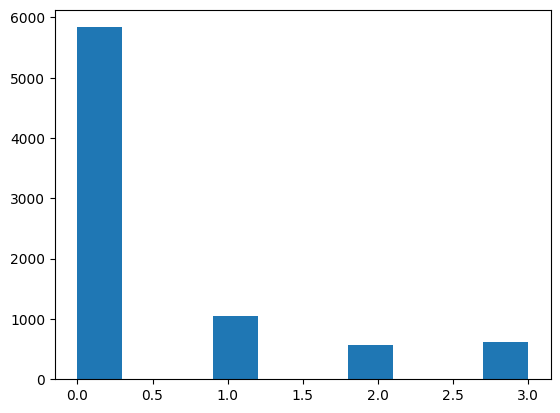

In [18]:
plt.hist(c1)
plt.show()

In [5]:
with open('../cvs_data/endoscapes/train/annotation_coco_vid.json', 'r') as f:
    train = json.load(f)
print(len(train['images']))

36694


In [32]:
def get_frame(file_path):
    frame = cv2.imread(file_path)
    frame = cv2.resize(frame, dsize=(224, 224))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = np.transpose(frame, (2, 0, 1))
    return frame

In [33]:
from collections import defaultdict

count = defaultdict(int)
frames = defaultdict(list)
for image in train['images']:
    video_id, frame_id = map(int, image['file_name'][:-4].split('_'))
    frames[video_id].append(frame_id)

images = []

for video_id in frames:
    frames[video_id].sort()
    for frame_id in frames[video_id]:
        file_name = (str(video_id)+'_'+str(frame_id)+'.jpg')
        # image = get_frame()

In [37]:
import glob

images = []

image_files = sorted(glob.glob('../cvs_data/endoscapes/train/*.jpg'))

for file in image_files:
    image = get_frame(file)
    images.append(image)

images = np.array(images)

In [43]:
import pickle

with open('./videos/endo_inputs', 'wb') as f:
    pickle.dump(images, f)

In [45]:
! du -h videos/endo_inputs

5.2G	videos/endo_inputs
